In [42]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X['actual_productivity'] = y
# metadata
print(productivity_prediction_of_garment_employees.metadata)

# variable information
print(productivity_prediction_of_garment_employees.variables)


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

<Axes: title={'center': ' Productivity Over Time'}, xlabel='Date', ylabel='Productivity'>

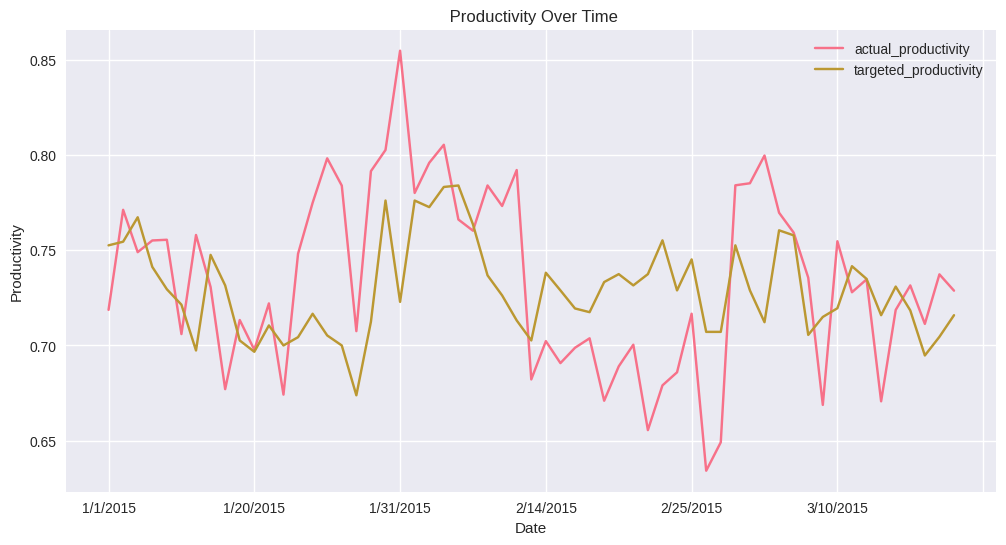

In [44]:
X.groupby(['date']).agg({'actual_productivity': 'mean','targeted_productivity': 'mean'}).plot(
    title=' Productivity Over Time',
    xlabel='Date',
    ylabel='Productivity',
    figsize=(12, 6))

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [80]:
X['achievement_ratio'] = X['actual_productivity'] / X['targeted_productivity']
X.groupby(pd.cut(X['incentive'], bins=[0, 69.5, 100, 200]))['achievement_ratio'].mean()

/tmp/ipykernel_16572/3113055543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X.groupby(pd.cut(X['incentive'], bins=[0, 69.5, 100, 200]))['achievement_ratio'].mean()


incentive
(0.0, 69.5]       1.004809
(69.5, 100.0]     1.133564
(100.0, 200.0]    1.262459
Name: achievement_ratio, dtype: float64

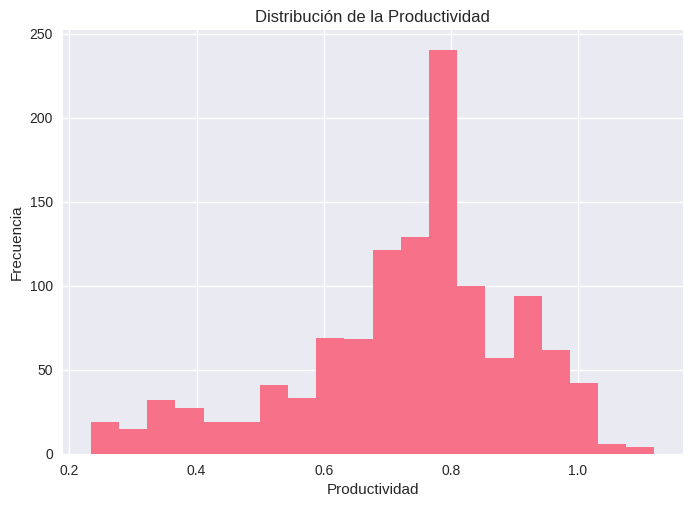

In [45]:
# 1. Distribución de 'actual_productivity' (para definir clases)
plt.hist(y['actual_productivity'], bins=20)
plt.xlabel('Productividad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Productividad')
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_all_columns(df):
    # Get the number of columns
    n_cols = len(df.columns)

    # Calculate number of rows needed for subplot grid
    n_rows = (n_cols + 2) // 3  # 3 plots per row

    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 5*n_rows))

    for idx, col in enumerate(df.columns, 1):
        plt.subplot(n_rows, 3, idx)

        # For numeric columns
        if pd.api.types.is_numeric_dtype(df[col]):
            # Histogram for numeric data
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'Distribution of {col}')

        # For categorical columns
        else:
            # Bar plot for categorical data
            value_counts = df[col].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45)
            plt.title(f'Count of {col}')

    plt.tight_layout()
    plt.show()

# Create additional visualizations for relationships
def plot_correlations(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# Create additional visualizations for relationships
def plot_correlations(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# For specific column types:
def plot_column_details(df, column_name):
    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Box plot for numeric data
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of {column_name}')
    else:
        # Pie chart for categorical data
        plt.pie(df[column_name].value_counts(),
                labels=df[column_name].value_counts().index,
                autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name}')

    plt.show()

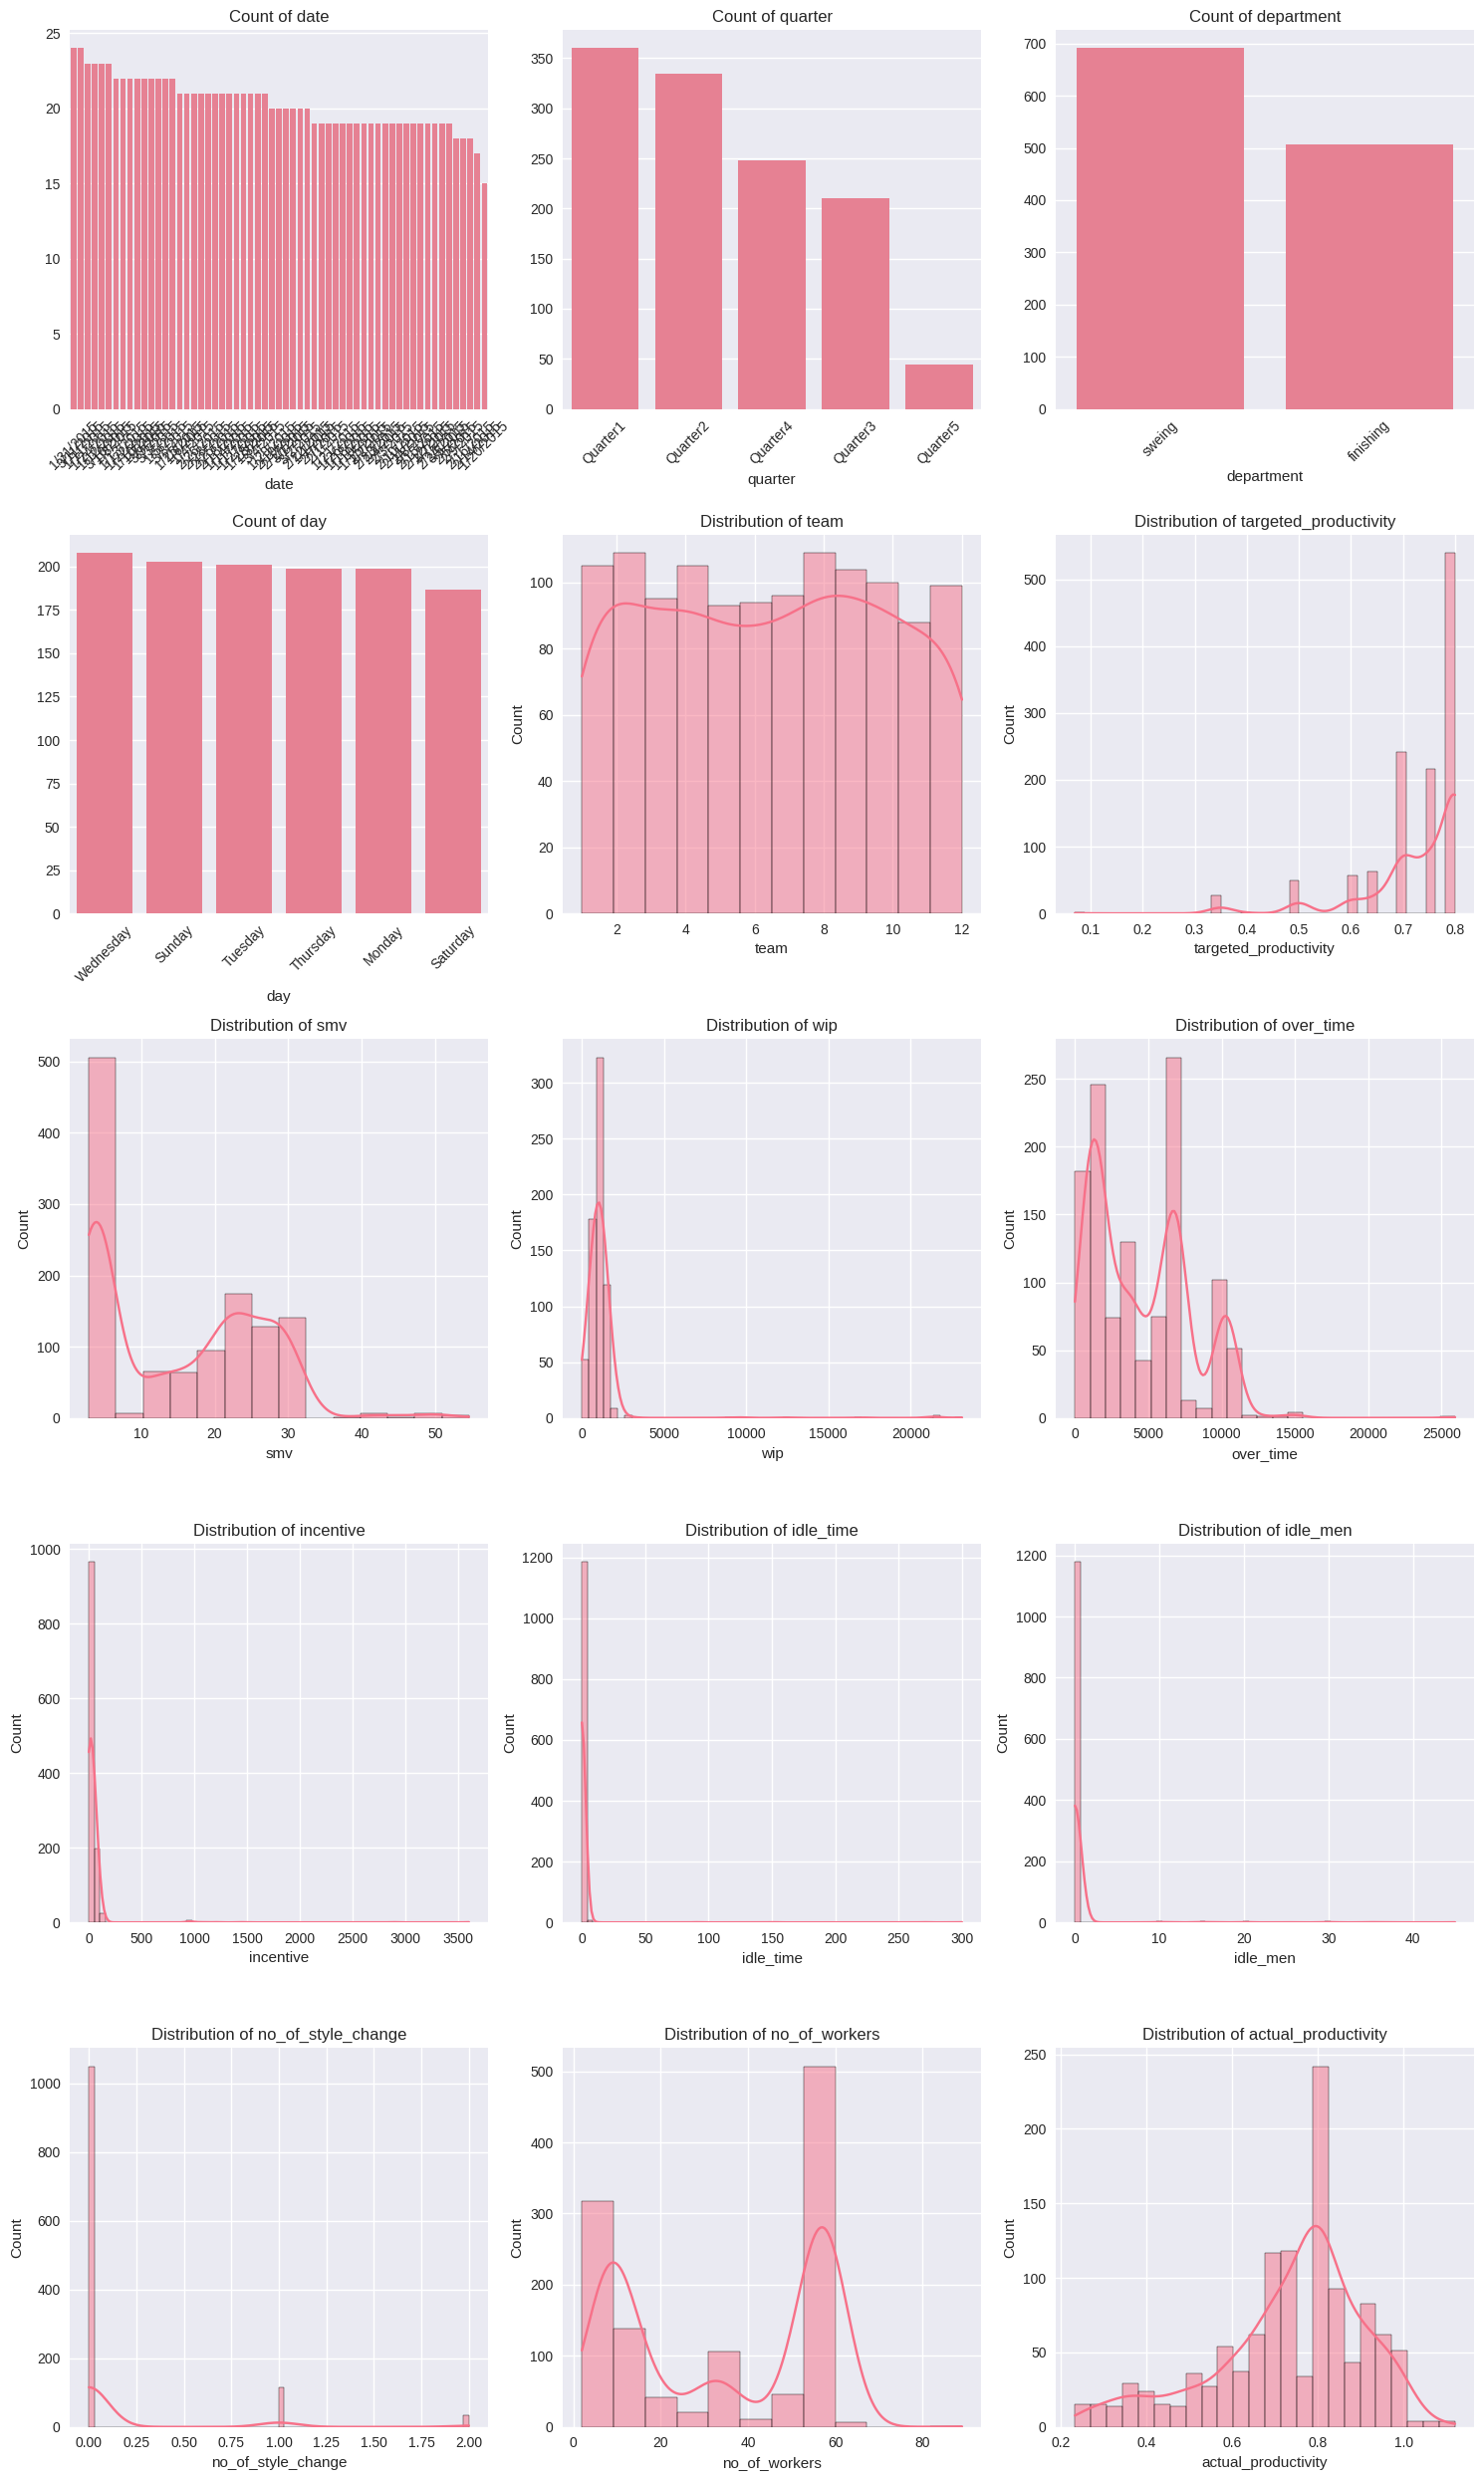

In [47]:
plot_all_columns(X)

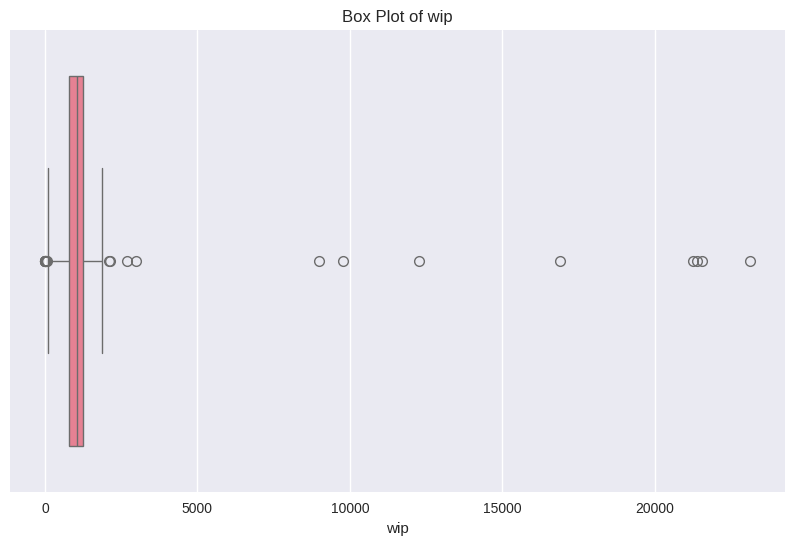

In [48]:
plot_column_details(X, 'wip')

In [49]:
# 3. Cardinalidad de variables categóricas
print("\nCategorías únicas:")
print("Departamento:", X['department'].unique())
print("Día de la semana:", X['day'].unique())
print("Trimestre:", X['quarter'].unique())
print("Equipos:", X['team'].nunique())


Categorías únicas:
Departamento: ['sweing' 'finishing']
Día de la semana: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Trimestre: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Equipos: 12


In [81]:
# 4. Rango de fechas
print("\nRango de fechas:")
print("Mínima:", X['date'].min())
print("Máxima:", X['date'].max())
print(set(X['quarter']))


Rango de fechas:
Mínima: 1/1/2015
Máxima: 3/9/2015
{'Quarter1', 'Quarter3', 'Quarter5', 'Quarter4', 'Quarter2'}


In [86]:
# 3. Cardinalidad de variables categóricas
print("\nCategorías únicas:")
print("Departamento:", X['department'].unique())
print("Día de la semana:", X['day'].unique())
#print("Trimestre:", X['quarter'].unique())
print("Equipos:", X['team'].nunique())
print("Estilo de cambio:", X['no_of_style_change'].nunique())



Categorías únicas:
Departamento: ['sweing' 'finishing']
Día de la semana: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Equipos: 12
Estilo de cambio: 3


In [97]:
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,achievement_ratio,day_of_year,day_of_month,month
0,Quarter1,sweing,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1.175907,1,1,1
1,Quarter1,finishing,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1.182000,1,1,1
2,Quarter1,sweing,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1.000713,1,1,1
3,Quarter1,sweing,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1.000713,1,1,1
4,Quarter1,sweing,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1.000477,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,2,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,0.837778,70,11,3
1193,Quarter2,finishing,2,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,0.893750,70,11,3
1194,Quarter2,finishing,2,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,0.962500,70,11,3
1195,Quarter2,finishing,2,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,0.674519,70,11,3


In [98]:
dict_days = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

dict_departments = {
    'sweing': 1,
    'finishing': 2,
}

In [ ]:
X['day'] = X['day'].apply(lambda x: dict_days[x])
X['department'] = X['department'].apply(lambda x: dict_departments[x])




In [105]:
X[['team', 'quarter', 'no_of_style_change']]

,team,quarter,no_of_style_change
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
1192,9,1,0
1193,0,1,0
1194,5,1,0
1195,8,1,0


In [103]:
def apply_label_encoding(df, columns):
    for column in columns:
        unique_values = df[column].unique()
        value_to_int = {value: idx for idx, value in enumerate(unique_values)}
        df[column] = df[column].map(value_to_int)
    return df

In [ ]:
X = apply_label_encoding(X, ['day', 'department'])

In [51]:
#X['have_idle_men'] = X['idle_men']>0
#X['have_incentive'] = X['incentive']>0
# Drop columns
# At least 98% is 0
X.drop(columns=['idle_men'], inplace=True)

In [83]:
# Add day and monthss
X['day_of_year'] = pd.to_datetime(X['date']).dt.dayofyear
X['day_of_month'] = pd.to_datetime(X['date']).dt.day
X['month'] = pd.to_datetime(X['date']).dt.month
X.drop(columns=['date'], inplace=True)

# Date range 01/01/2015 to 09/03/2015
# Every happends in the same year and first three months.

In [84]:
X[['day_of_year', 'month', 'day_of_month']]

,day_of_year,month,day_of_month
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
1192,70,3,11
1193,70,3,11
1194,70,3,11
1195,70,3,11


In [53]:
# Quarter data is from values to 1 to 5, in three months?
X.drop(columns=['quarter'], inplace=True)
X.drop_duplicates(inplace=True)

In [54]:
#X['wip'] = X['wip'].fillna(0)

In [55]:
# One hot encoding

dept_dummies = pd.get_dummies(X['department'], prefix='dept_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, dept_dummies], axis=1)

# Optionally remove the original department column
X.drop('department', axis=1, inplace=True)

In [56]:
# One hot encoding

style_dummies = pd.get_dummies(X['no_of_style_change'], prefix='style_no_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, style_dummies], axis=1)

# Optionally remove the original department column
X.drop('no_of_style_change', axis=1, inplace=True)

In [57]:
# One hot encoding

day_dummies = pd.get_dummies(X['day'], prefix='day_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, day_dummies], axis=1)

# Optionally remove the original department column
X.drop('day', axis=1, inplace=True)

In [58]:
# One hot encoding

team_dummies = pd.get_dummies(X['team'], prefix='team_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, team_dummies], axis=1)

# Optionally remove the original department column
X.drop('team', axis=1, inplace=True)

In [ ]:
# Definir columnas numéricas y categóricas
numeric_features = ['targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'no_of_workers']
categorical_features = ['department', 'day', 'quarter', 'team']

# Imputar valores faltantes en 'wip'
#X['wip'] = X['wip'].fillna(X['wip'].median())

# Se escala variables numéricas
scaler = StandardScaler()

# Se codifica variables categóricas
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#X_cat = encoder.fit_transform(X[categorical_features])

# Combinar variables numéricas y categóricas
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [60]:
X

,targeted_productivity,smv,wip,over_time,incentive,idle_time,no_of_workers,actual_productivity,day_of_year,day_of_month,...,team__3,team__4,team__5,team__6,team__7,team__8,team__9,team__10,team__11,team__12
0,0.719137,1.014552,1108.0,0.750589,0.373414,-0.057473,1.099229,0.940725,1,1,...,False,False,False,False,False,True,False,False,False,False
1,0.208151,-1.016778,NaN,-1.077682,-0.238643,-0.057473,-1.199268,0.886500,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0.719137,-0.333878,968.0,-0.271092,0.073631,-0.057473,-0.185225,0.800570,1,1,...,False,False,False,False,False,False,False,False,True,False
3,0.719137,-0.333878,968.0,-0.271092,0.073631,-0.057473,-0.185225,0.800570,1,1,...,False,False,False,False,False,False,False,False,False,True
4,0.719137,0.990783,1170.0,-0.790895,0.073631,-0.057473,0.964023,0.800382,1,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.208151,-1.111853,NaN,-1.077682,-0.238643,-0.057473,-1.199268,0.628333,70,11,...,False,False,False,False,False,False,False,True,False,False
1193,-0.302835,-1.020434,NaN,-1.077682,-0.238643,-0.057473,-1.199268,0.625625,70,11,...,False,False,False,False,False,True,False,False,False,False
1194,-0.813821,-1.020434,NaN,-1.077682,-0.238643,-0.057473,-1.199268,0.625625,70,11,...,False,False,False,False,True,False,False,False,False,False
1195,0.208151,-1.111853,NaN,-0.826743,-0.238643,-0.057473,-0.883788,0.505889,70,11,...,False,False,False,False,False,False,True,False,False,False


### Solución 1: Clasificación Básica (Sin Técnicas Avanzadas)

In [61]:
# Eliminar filas con productividad > 1 (errores)
X = X.drop(X[X.actual_productivity > 1].index)

In [62]:
# Discretizar la variable objetivo
# Clasificación binaria: Baja (<0.6), Alta (>=0.6)
y_bin = pd.cut(X['actual_productivity'], bins=[0, 0.6, 1], labels=['Baja', 'Alta'])

In [63]:
# Clasificación multiclase: Baja (<0.6), Media (0.6-0.9), Alta (>=0.9)
y_multi = pd.cut(X['actual_productivity'], bins=[0, 0.6, 0.9, 1], labels=['Baja', 'Media', 'Alta'])

### Procesamiento Manual de Variables

In [64]:
X.drop(columns=['actual_productivity'], inplace=True)

In [65]:
X

,targeted_productivity,smv,wip,over_time,incentive,idle_time,no_of_workers,day_of_year,day_of_month,month,...,team__3,team__4,team__5,team__6,team__7,team__8,team__9,team__10,team__11,team__12
0,0.719137,1.014552,1108.0,0.750589,0.373414,-0.057473,1.099229,1,1,1,...,False,False,False,False,False,True,False,False,False,False
1,0.208151,-1.016778,NaN,-1.077682,-0.238643,-0.057473,-1.199268,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0.719137,-0.333878,968.0,-0.271092,0.073631,-0.057473,-0.185225,1,1,1,...,False,False,False,False,False,False,False,False,True,False
3,0.719137,-0.333878,968.0,-0.271092,0.073631,-0.057473,-0.185225,1,1,1,...,False,False,False,False,False,False,False,False,False,True
4,0.719137,0.990783,1170.0,-0.790895,0.073631,-0.057473,0.964023,1,1,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.208151,-1.111853,NaN,-1.077682,-0.238643,-0.057473,-1.199268,70,11,3,...,False,False,False,False,False,False,False,True,False,False
1193,-0.302835,-1.020434,NaN,-1.077682,-0.238643,-0.057473,-1.199268,70,11,3,...,False,False,False,False,False,True,False,False,False,False
1194,-0.813821,-1.020434,NaN,-1.077682,-0.238643,-0.057473,-1.199268,70,11,3,...,False,False,False,False,True,False,False,False,False,False
1195,0.208151,-1.111853,NaN,-0.826743,-0.238643,-0.057473,-0.883788,70,11,3,...,False,False,False,False,False,False,True,False,False,False


### Entrenar Modelos (Ejemplo para Clasificación Binaria)

In [69]:
X

,targeted_productivity,smv,wip,over_time,incentive,idle_time,no_of_workers,day_of_year,day_of_month,month,...,team__3,team__4,team__5,team__6,team__7,team__8,team__9,team__10,team__11,team__12
0,0.719137,1.014552,1108.0,0.750589,0.373414,-0.057473,1.099229,1,1,1,...,False,False,False,False,False,True,False,False,False,False
1,0.208151,-1.016778,NaN,-1.077682,-0.238643,-0.057473,-1.199268,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0.719137,-0.333878,968.0,-0.271092,0.073631,-0.057473,-0.185225,1,1,1,...,False,False,False,False,False,False,False,False,True,False
3,0.719137,-0.333878,968.0,-0.271092,0.073631,-0.057473,-0.185225,1,1,1,...,False,False,False,False,False,False,False,False,False,True
4,0.719137,0.990783,1170.0,-0.790895,0.073631,-0.057473,0.964023,1,1,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.208151,-1.111853,NaN,-1.077682,-0.238643,-0.057473,-1.199268,70,11,3,...,False,False,False,False,False,False,False,True,False,False
1193,-0.302835,-1.020434,NaN,-1.077682,-0.238643,-0.057473,-1.199268,70,11,3,...,False,False,False,False,False,True,False,False,False,False
1194,-0.813821,-1.020434,NaN,-1.077682,-0.238643,-0.057473,-1.199268,70,11,3,...,False,False,False,False,True,False,False,False,False,False
1195,0.208151,-1.111853,NaN,-0.826743,-0.238643,-0.057473,-0.883788,70,11,3,...,False,False,False,False,False,False,True,False,False,False


In [66]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Binaria):", accuracy_score(y_test, y_pred))

Precisión (Binaria): 0.7787356321839081


Accuracy: 0.7327586206896551


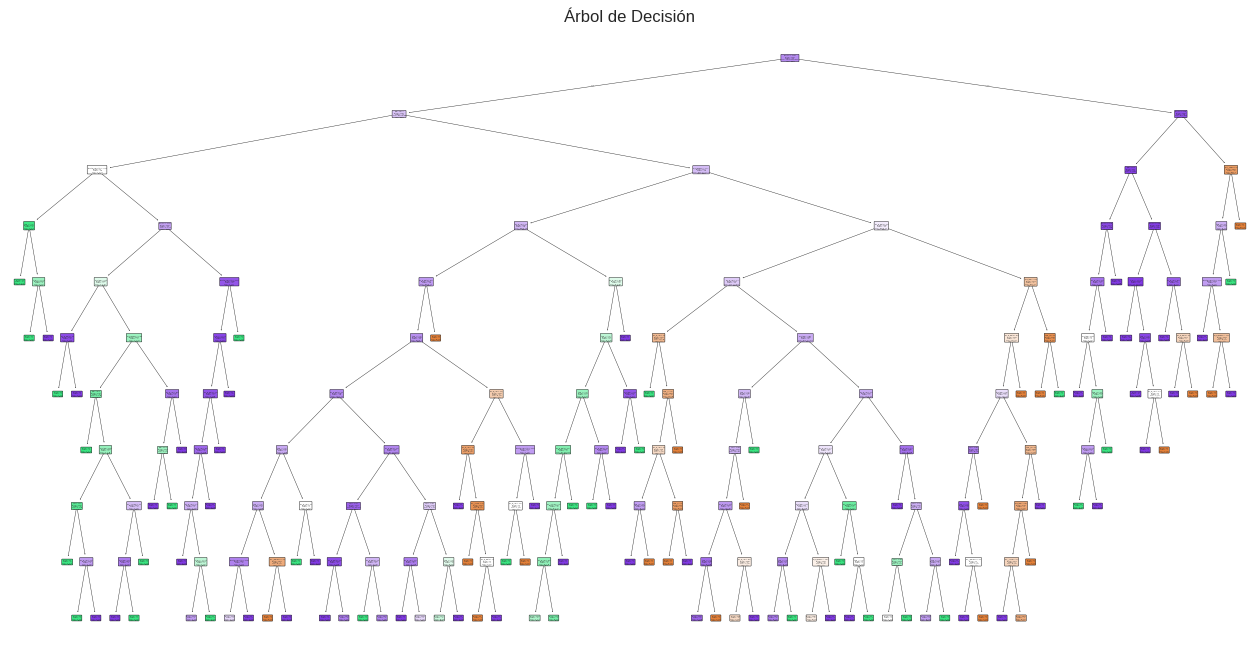

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()


## Solucion 2 KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### SVM

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#for i in range(1, 11):
#    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
#        svm = SVC(kernel=kernel, C=i, random_state=42)
#        svm.fit(X_train, y_train)
#        y_pred = svm.predict(X_test)
#        print(f"Accuracy with kernel={kernel}: {accuracy_score(y_test, y_pred)}")


## Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predecir y evaluar
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6781609195402298


/home/noah/Projects/PUCP_machine-learning_garment-productivity/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Solución 2: Clasificación Avanzada (Con Balanceo y Optimización)

### Balanceo de Clases (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Dividir datos originales (sin balancear)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Aplicar SMOTE solo en entrenamiento (ejemplo para clasificación multiclase)
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

### Optimizar Hiperparámetros (GridSearchCV)

In [ ]:
"""
from sklearn.model_selection import GridSearchCV

# Definir parámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Búsqueda en grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5
)
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrica para multiclase
    cv=5,
    n_jobs=-1
)

# Ejecutar búsqueda en datos balanceados
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

### Evaluación en Conjunto de Prueba No Balanceado

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = best_model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

### Validación Cruzada y Evaluación

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(best_model, X_bal, y_bal, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))


# Evaluar en datos de prueba
#X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
#y_pred = best_model.predict(X_test)
#print("Precisión (Multiclase):", accuracy_score(y_test, y_pred))